# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import utils as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
dataset = pd.read_csv('data/dataset.csv')
dataset.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
dataset.set_index('index', inplace=True)

train = pd.read_csv('data/train.csv')
train.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)
test = pd.read_csv('data/test.csv')
test.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
test.set_index('index', inplace=True)

In [12]:
dataset

,y,rad,tex,per,area,smo,com,conc,concp,sym,fra
index,,,,,,,,,,,
1,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
4,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662
5,1,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079
...,...,...,...,...,...,...,...,...,...,...,...
565,9,-1.360450,0.616212,-1.356396,-1.110751,-0.281587,-0.914381,-0.612637,-0.930322,-0.436337,0.419580
566,9,-1.088887,1.934499,-1.082310,-0.947643,-0.430903,-0.525649,-0.361382,-0.555092,-0.797463,-0.216364
567,9,-1.334911,1.997275,-1.346107,-1.090008,-1.075807,-1.034428,-1.113893,-1.260710,-0.253950,-0.312677


In [13]:
train

,y,rad,tex,per,area,smo,com,conc,concp,sym,fra
index,,,,,,,,,,,
1,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
4,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662
5,1,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079
...,...,...,...,...,...,...,...,...,...,...,...
281,0,-0.021933,1.827549,-0.024241,-0.154836,0.208311,0.156383,-0.554182,-0.151513,-1.001736,-0.154044
282,1,0.310072,2.634331,0.470430,0.176210,0.600088,1.976019,2.084810,1.169266,1.154075,1.235403
283,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209


In [14]:
test

,y,rad,tex,per,area,smo,com,conc,concp,sym,fra
index,,,,,,,,,,,
286,9,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
287,9,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
288,9,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343
289,9,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894
290,9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649
...,...,...,...,...,...,...,...,...,...,...,...
565,9,-1.360450,0.616212,-1.356396,-1.110751,-0.281587,-0.914381,-0.612637,-0.930322,-0.436337,0.419580
566,9,-1.088887,1.934499,-1.082310,-0.947643,-0.430903,-0.525649,-0.361382,-0.555092,-0.797463,-0.216364
567,9,-1.334911,1.997275,-1.346107,-1.090008,-1.075807,-1.034428,-1.113893,-1.260710,-0.253950,-0.312677


## Imbalanced label

In [15]:
np.mean(train['y'])

0.35789473684210527

## Distribution of numeric features

Numeric summary.

In [16]:
train.describe()

,y,rad,tex,per,area,smo,com,conc,concp,sym,fra
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.357895,-0.010842,-0.023462,-0.002792,-0.004363,0.021016,0.062575,0.064729,0.017261,0.022510,0.060899
std,0.480224,1.024876,0.980730,1.033297,1.036493,1.025672,1.058947,1.105083,1.060488,1.039476,0.963596
min,0.000000,-1.815608,-2.227289,-1.812793,-1.352856,-3.109349,-1.608721,-1.113893,-1.260710,-2.220079,-1.778607
25%,0.000000,-0.700130,-0.760200,-0.709867,-0.671156,-0.710338,-0.704773,-0.755763,-0.759458,-0.702621,-0.554874
50%,0.000000,-0.263132,-0.092919,-0.267050,-0.329595,0.007090,-0.137296,-0.319235,-0.401495,-0.075211,-0.093141
75%,1.000000,0.446279,0.599937,0.445737,0.317438,0.692522,0.533186,0.615916,0.739659,0.526665,0.503146
max,1.000000,3.967796,3.376013,3.972634,5.240230,4.766717,4.564409,4.239858,3.924477,3.992012,4.563843


Conduct Shapiro-Wilk test to test normality.

Actually, it doesn't matter much even if the covariates are not normally distributed.

In [17]:
# Shapiro-Wilk test
pvalues = []
for i in range(1, 11):
    pvalues.append(stats.shapiro(train.iloc[:,i])[1])
print(pvalues)
print("\nThe smallest p-value:")
print(min(pvalues)) # smallest pvalue
print("\nThe index of the smallest p-value:")
print(pvalues.index(min(pvalues)))

pvalues = np.array(pvalues)
k = 4
result = np.argpartition(pvalues, k)
print(f"\n{k} smallest p-values:")
print(pvalues[result[:k]])

[1.270684391041499e-10, 0.008311355486512184, 3.627542016770846e-11, 1.4990902920558895e-16, 0.002965618623420596, 1.6431514135439862e-11, 1.1341824103294285e-15, 2.5119344809493988e-14, 3.182653927069623e-07, 7.114887151660199e-11]

The smallest p-value:
1.4990902920558895e-16

The index of the smallest p-value:
3

4 smallest p-values:
[1.49909029e-16 1.13418241e-15 2.51193448e-14 1.64315141e-11]


Density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test.

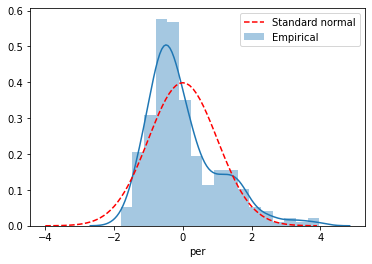

In [20]:
# density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test
sns.distplot(train.iloc[:, 3], label = "Empirical")
h = np.arange(-4, 4, 0.1)
fit = stats.norm.pdf(h, 0, 1) 
plt.plot(h, fit, 'r--', label = "Standard normal")
plt.legend()
plt.show()

## Correlation of numeric features

The image has been saved to 'images/heatmap.pdf'.


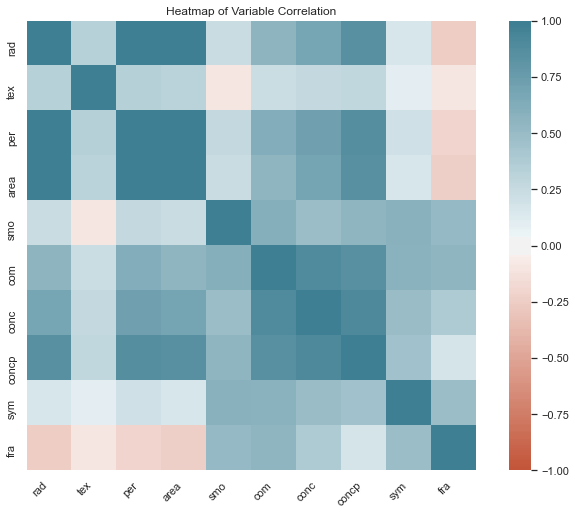

Grouping:
1: ['rad', 'per', 'area', 'concp']
2: ['com', 'conc']
Others: ['tex', 'smo', 'sym', 'fra']


In [21]:
# correlation heatmap
X = train.drop(columns = ['y'])
ut.show_corr(X, cutoff=0.7)

## Preliminary variable selection

Investigate the relationship between numeric features and response by boxplot. 

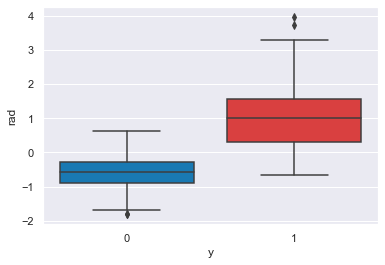

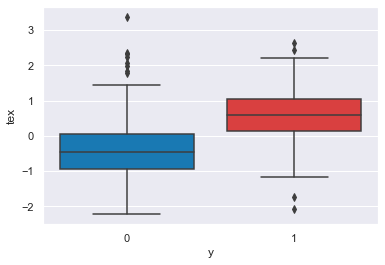

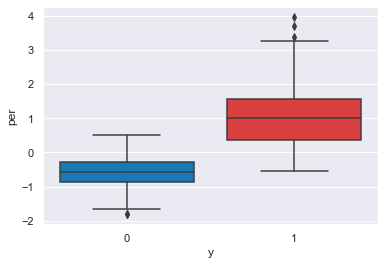

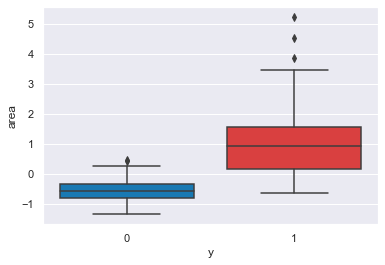

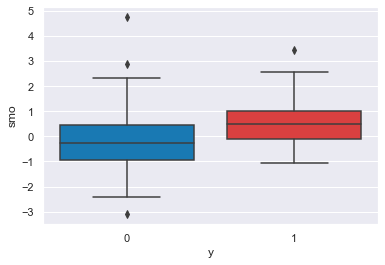

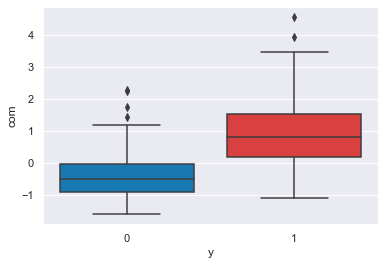

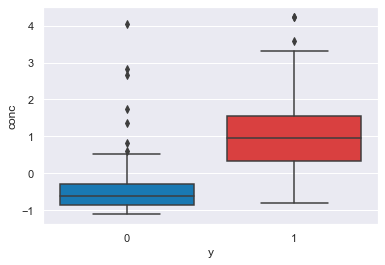

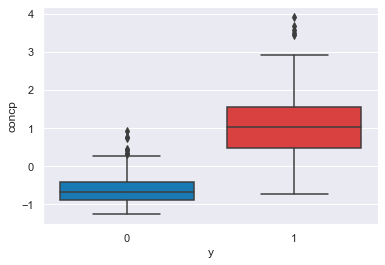

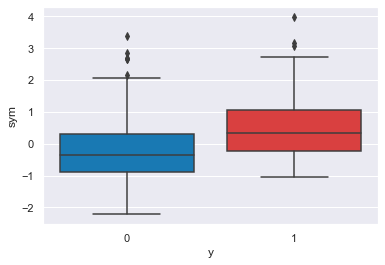

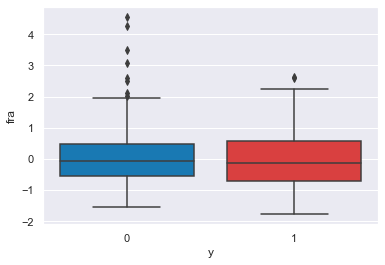

In [22]:
# boxplot: covariate vs response
for i in range(1, 11):
    sns.boxplot(x = train["y"], y = train.iloc[:, i], palette=[(0, 0.50, 0.80),(0.95, 0.15, 0.15)])
    plt.show()

By examine the boxplots, we found except for `fra`, all other variables are significant.

##  Identical distribution of the training and testing data

Conduct Kolmogorov-Smirnov test between training and test set to test they have identical distribution.

In [23]:
##  Kolmogorov-Smirnov test between train and test
pvalues_KS = []
for i in range(1, 11):
    pvalues_KS.append(stats.ks_2samp(train.iloc[:,i], test.iloc[:,i])[1])
print(pvalues_KS)

print("\nThe smallest p-value:")
print(min(pvalues_KS))

pvalues_KS = np.array(pvalues_KS)
k = 4
result = np.argpartition(pvalues_KS, k)
print(f"\n{k} smallest p-values:")
print(pvalues_KS[result[:k]])

[0.8134455833714642, 0.9798641973996761, 0.8258251079754675, 0.8725247886672455, 0.2709911017279074, 0.5030802897398907, 0.2877122106624025, 0.5989701154772322, 0.9087172219124175, 0.059598676311822696]

The smallest p-value:
0.059598676311822696

4 smallest p-values:
[0.05959868 0.2709911  0.28771221 0.50308029]


All numeric features have identical distribution in training and test set.